# Pycaret - regression model

A prediction model is going to be done to estimate the mean temperature for a certain day based on the month and the year. The dataset going to be used is presented below. 



In [17]:
import pandas as pd

In [20]:
df = pd.read_csv('./df_clean.csv')

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C)
0,1961-01-01,1961,1,1,4.4,-5.6,-0.6,18.6
1,1961-01-02,1961,1,2,3.9,-3.9,0.0,18.0
2,1961-01-03,1961,1,3,-1.1,-6.7,-3.9,21.9
3,1961-01-04,1961,1,4,-3.9,-7.2,-5.6,23.6
4,1961-01-05,1961,1,5,-7.8,-10.6,-9.2,27.2
...,...,...,...,...,...,...,...,...
22516,2022-12-27,2022,12,27,1.7,-5.6,-2.0,20.0
22517,2022-12-28,2022,12,28,-2.3,-9.2,-5.8,23.8
22518,2022-12-29,2022,12,29,-1.5,-5.6,-3.6,21.6
22519,2022-12-30,2022,12,30,8.0,-2.7,2.7,15.3


Before running a regression model, it is important to drop columns that would have colinearity with the dependant variable (mean temperature). If those columns were kept, the fitted regression model would have the tendency of having an R² close to 1.0 and would mislead our predictions. From the dataset used for this analysis, the following columns were removed 'Date/Time','Max Temp (°C)', 'Min Temp (°C)', 'Heat Deg Days (°C)'

In [21]:
pycaret_df = df.drop(['Date/Time','Max Temp (°C)', 'Min Temp (°C)', 'Heat Deg Days (°C)'], axis=1)
pycaret_df

,Year,Month,Day,Mean Temp (°C)
0,1961,1,1,-0.6
1,1961,1,2,0.0
2,1961,1,3,-3.9
3,1961,1,4,-5.6
4,1961,1,5,-9.2
...,...,...,...,...
22516,2022,12,27,-2.0
22517,2022,12,28,-5.8
22518,2022,12,29,-3.6
22519,2022,12,30,2.7


In [22]:
from pycaret.regression import *

In [23]:
s = setup(data=pycaret_df, target ='Mean Temp (°C)')

,Description,Value
0,Session id,1076
1,Target,Mean Temp (°C)
2,Target type,Regression
3,Original data shape,"(22521, 4)"
4,Transformed data shape,"(22521, 4)"
5,Transformed train set shape,"(15764, 4)"
6,Transformed test set shape,"(6757, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


It was run a compare_models() funtion to check for the best regression model to this dataset. The best one (highest R²) is the Random Forest Regressor model. This model was used to predict the Mean Temperature (°C). For simplicity and faster running times, the compare_models() function ws no run here below. 

In [ ]:
# best = compare_models()

The next step is to create a model for the Random Forest Regressor. As I am using a laptop woth limited hardware capabilities, I have decided to include the function "%%time" to check how long it takes to run this step.

In [24]:
%%time
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7693,12.9935,3.6046,0.8624,0.5428,1.0716
1,2.6834,12.4303,3.5257,0.8643,0.5316,0.8195
2,2.7607,13.2181,3.6357,0.8563,0.5379,0.9349
3,2.6113,11.6811,3.4178,0.8739,0.5237,0.9866
4,2.6969,12.4984,3.5353,0.8623,0.5321,0.9652
5,2.7366,12.8842,3.5895,0.8614,0.5436,0.9468
6,2.7127,12.5780,3.5466,0.8621,0.5304,1.1206
7,2.6420,11.8952,3.4489,0.8688,0.5298,0.9685
8,2.7213,12.9919,3.6044,0.8612,0.5228,0.8831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wall time: 1min 17s


## Analyze model

Following the model creation, the model will be analyzed. One of the items to be checked is the feature importance, which shows the parameters that most influence the prediction for the mean temperature. It will also be checked the residuals plot, which shows the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

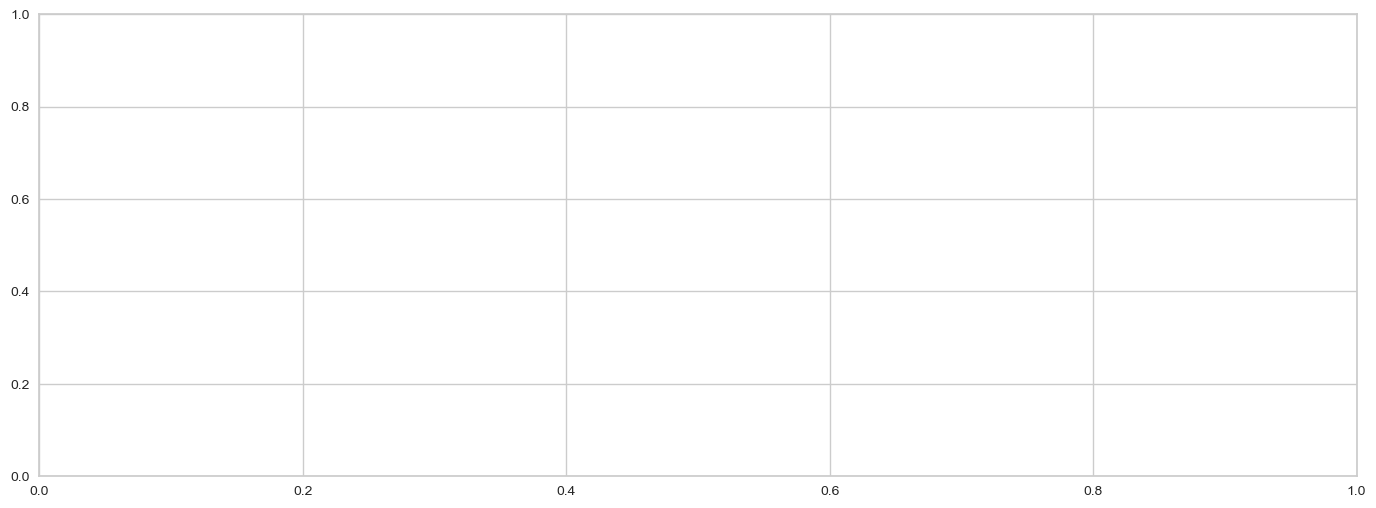

In [31]:
evaluate_model(rf)

The predict_model() function will run the trained model against the test dataset that was set aside on the setup() function above.

In [26]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.6606,12.2028,3.4933,0.8702,0.5257,0.8846


,Year,Month,Day,Mean Temp (°C),prediction_label
3348,1970,3,3,-4.8,-4.038
2991,1969,3,11,0.8,-0.855
16949,2007,6,4,9.2,12.746
15114,2002,5,25,9.5,11.568
4449,1973,3,8,3.3,0.618
...,...,...,...,...,...
10633,1990,2,11,0.2,-1.004
3469,1970,7,2,13.1,18.099
520,1962,6,5,12.5,11.568
6516,1978,11,4,6.3,8.640


This prediction model has a high R² and predicts pretty well the mean temperature for each day, taking also into consideration the month and the year.

After the prediction model is done it is time to save do prediction model so it can be used against a new data set.

In [27]:
save_model(rf,'Mean_Temp_Prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lacerda\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Month', 'Day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=1076))]),
 'Mean_Temp_Prediction.pkl')

# Yellowbrick

Now we are going to reproduce the Pycaret prediction using Yellowbrick and compare how they behave. Yellowbrick is based on Scikit-Learn and Matplotlib libraries.


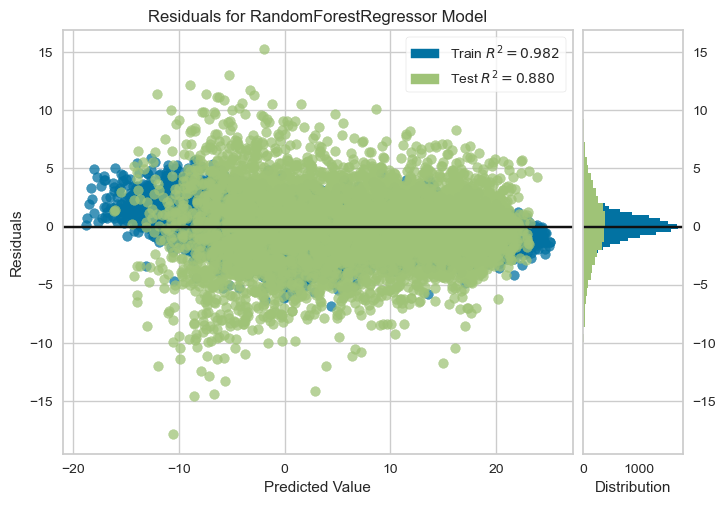

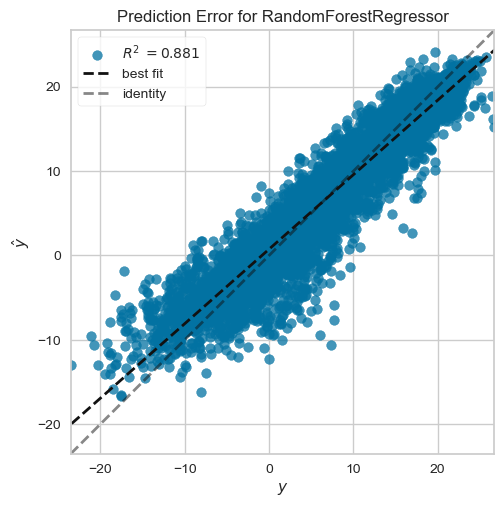

In [30]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline


from yellowbrick.regressor import residuals_plot,PredictionError


# Load the dataset and split into train/test splits
X = pycaret_df[['Year','Month','Day']]
y = pycaret_df['Mean Temp (°C)']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure
